**4101553 Métodos Numéricos aplicados a la Ingenieria Civil**
-
Departamento de Ingeniería Civil

Universidad Nacional de Colombia

Sede Manizales

**Docente:** Juan Nicolás Ramírez Giraldo ([jnramirezg@unal.edu.co](mailto:jnramirezg@unal.edu.co))

"*Cum cogitaveris quot te antecedant, respice quot sequantur*" (**Séneca**)


[Repositorio de la asignatura](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/)

---

**Unidad 2: Interpolación**
-

En esta unidad trataremos los problemas ligados a la *interpolación* que, en esencia busca **obtener nuevos puntos** a partir de un conjunto de puntos conocido.

En sistesis, sus aplicaciones:
- Aproximación de una función complicada.
- Construir una función que se ajuste a un conjunto de datos.

En esta parte del contenido temático profundizaremos en el uso de gráficas en 2D y 3D para la representación de la información obtenida.

---

**Contenido**
- 2.1. Interpolación polinómica
- 2.2. Interpolación con trazadores
- 2.3. Interpolación en varias dimensiones
- 2.4. Vecinos más cercanos - distancia inversa ponderada

---

# **2.1. Interpolación polinómica**

En ocasiones se requiere encontrar valores intermedios entres puntos asociados con datos. El método más común que se usa para este objetivo es la *interpolación polinomial*. Un polinomio de grado $n$ tiene la forma general:

$f(x)=a_0 +a_1x+a_2x^2+...+a_nx^n$ 

Para $n+1$ puntos asociados con datos.

---

**Unicidad del polinomio interpolador:**
Se puede demostrar que el polinomio de grado $n$ que pasa por los $n+1$ puntos es *único*.

---

- 2.1.1. Interpolación lineal
- 2.1.2. Interpolación cuadrática
- 2.1.3. Interpolación con la matriz de Vandermonde
- 2.1.4. Interpolación de Newton
- 2.1.5. Interpolación de Lagrange
- 2.1.6. Algunos comandos específicos

---

Importación de librerías necesarias

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

---

## **2.1.1. Interpolación lineal**

Dado dos puntos asociados a datos experimentales $(x_0, y_0)$ y $(x_1, y_1)$,la forma más simple de unirlos es con **una línea recta**. Esta única recta se puede obtener de la ecuación general de la recta:

$\displaystyle\frac{y-y_0}{x-x_0}=\displaystyle\frac{y_1-y_0}{x_1-x_0}$

Haciendo $y=f(x)$ y despejando $f(x)$:

$f(x)=y_0+\displaystyle\frac{y_1-y_0}{x_1-x_0}(x-x_0)$ **Ec.(1)**

A partir de esta expresión se pueden conocer nuevos puntos. Es la forma sistemática de realizar la interpolación por semejanza de triángulos, que se suele hacer en varios campos de la ingeniería.

---

**Ejemplo:** Si se tienen los puntos experimentales $p_1=(1, 1)$ y $p_2=(5, 6)$

In [2]:
x0, y0 = 1, 1  # Punto 1.
x1, y1 = 5, 6  # Punto 2.

In [3]:
x = sp.symbols('x')

In [4]:
y = y0 + (y1-y0)/(x1-x0)*(x-x0)  # Aplicación de la Ec.(1)

In [5]:
y

1.25*x - 0.25

---

Se usa la función `sp.lambdify()` que, covierte en función la ecuación simbólica `y` y se le advierte que `x` es la variable de la función. La principal ventaja de esta estructura es que permite poner como argumentos de f números (`float` o `int`) o conjuntos de datos (`np.array`).

In [6]:
f = sp.lambdify(x, y)

Se evalúa la función f en algunos puntos intermedios entre $x_0=1$ y $x_1=5$.

In [7]:
f(3)

3.5

In [8]:
f(1.75)

1.9375

---

Se grafica la interpolación:

In [9]:
x_g = np.linspace(x0, x1, 100)

In [10]:
y_g = f(x_g)

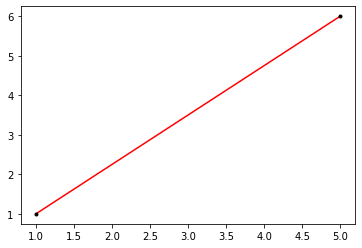

In [11]:
plt.plot(x_g, y_g, 'r')             # Se grafica la función.
plt.plot([x0, x1], [y0, y1], 'k.')  # Se grafican los puntos.
plt.show()

---

## **2.1.2. Interpolación cuadrática**

Dado tres puntos asociados a datos experimentales $(x_0, y_0)$, $(x_1, y_1)$ y $(x_2, y_2)$ la forma polinómica de unirlos es una **parábola**, la cual es única.

Es claro, que un polinomio de grado 2 tiene la forma:

$f(x)=a_0+a_1x+a_2x^2$

---

**Obtención de los parámetros $a_0$, $a_1$ y $a_2$**

A partir de los 3 puntos, se generan las siguientes ecuaciones lineales:

$y_0 = a_0 + a_1x_0 + a_2x_0^2$

$y_1 = a_0 + a_1x_1 + a_2x_1^2$

$y_2 = a_0 + a_1x_2 + a_2x_2^2$

Se crea el siguiente sistema de ecuaciones y se resuleve de forma númerica en `numpy`.

$
\begin{bmatrix}
y_{0}  \\
y_{1}  \\
y_{2} 
\end{bmatrix}
=
\begin{bmatrix}
1 & x_0 & x_0^2\\
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2
\end{bmatrix}
\begin{bmatrix}
a_{0}  \\
a_{1}  \\
a_{2} 
\end{bmatrix}
$

---

**Ejemplo:** Si se tienen los puntos experimentales $p_1=(1, 0)$, $p_2=(4, 1.386294)$ y $p_3=(6, 1.791759)$

In [12]:
x0, y0 = 1, 0
x1, y1 = 4, 1.386294
x2, y2 = 6, 1.791759

In [13]:
Y = np.array([y0, y1, y2])

X = np.array([[1, x0, x0**2],
              [1, x1, x1**2],
              [1, x2, x2**2]])

In [14]:
a = np.linalg.solve(X, Y)  # Solución del sistema de ecuaciones con numpy.

In [15]:
a

array([-0.6695904,  0.7214635, -0.0518731])

---

Teniendo en cuenta que previamente había sido creado `x` como un símbolo de `sympy`, entonces:

In [16]:
y = a[0] + a[1]*x + a[2]*x**2

In [17]:
y

-0.0518731*x**2 + 0.7214635*x - 0.6695904

In [18]:
f = sp.lambdify(x, y)

Se evalúa la función f en algunos puntos intermedios $x$ entre 1 y 6.

In [19]:
f(6)

1.7917590000000003

---

Se grafica la interpolación:

In [20]:
x_g = np.linspace(x0, x2, 100)
y_g = f(x_g)

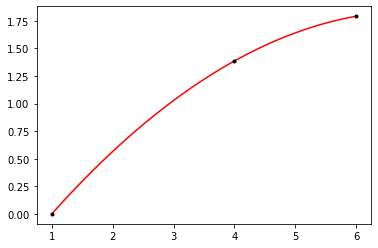

In [21]:
plt.plot(x_g, y_g, 'r')
plt.plot([x0, x1, x2], [y0, y1, y2], 'k.')
plt.show()

---

## **2.1.3. Interpolación con la matriz de Vandermonde**

Una alternativa en este caso es usar la interpolación polinómica de Newton, cuyo funcionamiento es *recursivo*, otra es obtener el polinomio interpolador con la *matriz de vandermonde*.

A partir de los 3 puntos, se se generaba en el caso anterior este sistema:

$
\begin{bmatrix}
y_{0}  \\
y_{1}  \\
y_{2} 
\end{bmatrix}
=
\begin{bmatrix}
1 & x_0 & x_0^2\\
1 & x_1 & x_1^2\\
1 & x_2 & x_2^2
\end{bmatrix}
\begin{bmatrix}
a_{0}  \\
a_{1}  \\
a_{2} 
\end{bmatrix}
$

En general para $n$ puntos se genera el siguiente sistema $nxn$ con una progresión geométrica en cada fila:

$
\begin{bmatrix}
y_{0}  \\
y_{1}  \\
y_{2}  \\
\vdots \\
y_{n}
\end{bmatrix}
=
\begin{bmatrix}
1     & x_0    & x_0^2 &...& x_0^n\\
1     & x_1    & x_1^2 &...& x_1^n\\
1     & x_2    & x_2^2 &...& x_2^n\\
\vdots& \vdots &\vdots &...&\vdots\\
1     & x_n    & x_2^2 &...& x_n^n\\
\end{bmatrix}
\begin{bmatrix}
a_{0}  \\
a_{1}  \\
a_{2}  \\
\vdots \\
a_{n}
\end{bmatrix}
$

---

### **2.1.3.1 Función de interpolación**

Se crea una función recibe un conjunto de n puntos (xi, yi) y devuelve una función polinómica interpoladora f, que puede ser evaluada. El polinomio resultante pasa por todos los puntos y es de grado n-1. Se requieren los módulos numpy y sympy.


In [22]:
xp = [1, 2, 3,  4]
yp = [1, 4, 9, 16]

In [23]:
xp = np.array(xp, dtype=float)  # De lista a array.
yp = np.array(yp, dtype=float)  # De lista a array.

In [24]:
m =len(xp)

In [25]:
X =(np.ones((m, m))*xp).T

for i in range(m):          # Ensamblaje
    X[:, i] = X[:, i]**i

In [26]:
X

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [27]:
a = np.linalg.solve(X, yp)  # Obtención de los coeficientes.

# Polinomio interpolador.
y = 0                       # Espacio de memoria.
for i in range(m):
    y += a[i]*x**i

In [28]:
y

-1.23259516440783e-32*x**3 + 1.0*x**2

---

Creación de la función que recibe un conjunto de datos xp y un conjunto de datos yp correspondientes a puntos en el plano. Regresa una función f que puede ser evaluada y un polinomio interpolador y simbólico. Internamente se usa la matriz de Vandermonde.

In [29]:
def interpolacion_vandermonde(xp, yp):
    x = sp.symbols('x')  # Crear nuestra variable simbólica.
    
    xp = np.array(xp, dtype=float)  # De lista a array.
    yp = np.array(yp, dtype=float)  # De lista a array.
    
    m =len(xp)         # Tamaño del sistema.
    
    # Matriz de Vandermonde X.
    X = (np.ones((m, m))*xp).T  # Reserva de memoria.    
    for i in range(m):          # Ensamblaje
        X[:, i] = X[:, i]**i

    a = np.linalg.solve(X, yp)  # Obtención de los coeficientes.

    # Polinomio interpolador.
    y = 0                       # Espacio de memoria.
    for i in range(m):
        y += a[i]*x**i
    
    # Creación de la función interpoladora.
    f = sp.lambdify(x, y)

    return f, y

Ver: [17-interpolacion_pol_vandermonde.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/17-interpolacion_pol_vandermonde.py)

---

Ejemplo 1:

In [30]:
xp = [0, 2, 3,  4, 5]
yp = [1, 4, 8, 16, 7]

In [31]:
f, y = interpolacion_vandermonde(xp, yp)

In [32]:
f(1.5)

5.085937499999851

In [33]:
y

-0.758333333333329*x**4 + 7.11666666666661*x**3 - 20.3416666666665*x**2 + 19.7833333333331*x + 1.0

In [34]:
xg = np.linspace(min(xp), max(xp), 100)
yg = f(xg)

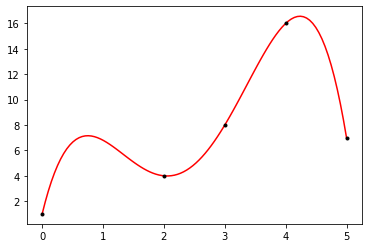

In [35]:
plt.plot(xg, yg, 'r')
plt.plot(xp, yp, 'k.')
plt.show()

---

## **2.1.4. Interpolación polinómica de Newton**

Es una de las formas para expresar una interpolación polinomial. Resulta bastante útil por su funcionamiento recursivo que, veremos más adelante.

---

### **2.1.4.1. Construcción del método**

**Interpolación lineal**

Para entender la forma como se construye el método, se trae la ecuación general de la recta:

$\displaystyle\frac{y-y_0}{x-x_0}=\displaystyle\frac{y_1-y_0}{x_1-x_0}$

y esta, en términos de función $f(x)=y$, entonces:

$\displaystyle\frac{f(x)-f(x_0)}{x-x_0}=\displaystyle\frac{f(x_1)-f(x_0)}{x_1-x_0}$

Luego, despejando de la misma forma que en la **Ec.(1)**, se obtiene:

$f(x)=f(x_0)+\displaystyle\frac{f(x_1)-f(x_0)}{x_1-x_0}(x-x_0)$ **Ec.(2)**

---

O en términos más generales de las constantes involucradas:

$f(x)=b_0+b_1(x-x_0)$  **Ec.(3)**,

donde:

$b_0=f(x_0)$

$b_1=\displaystyle\frac{f(x_1)-f(x_0)}{x_1-x_0}$

**Nota:** Se puede expresar el problema como $f(x)=a_0 + a_1x$, lo que resulta ser otra forma de hallar el mismo sistema a partir de constantes expredas en otro orden operacional.


---

**Interpolación cuadrática**



Si se cuenta con 3 puntos: $(x_0, y_0)$, $(x_1, y_1)$, $(x_2, y_2)$ y se quiere halla la parábola que pasa por ellos, se tiene la expresión general:

$f(x)=a_0 + a_1.x + a_2.x^2$

Con lo que se puede formar un sistema de $3x3$ para hallar las tres incógnitas, tal como se mostró en la **interpolación con la matriz de Vandermonde**. Sin embargo, el algoritmo recursivo de Newton se puede deducir si expresamos la expresión general en una forma análoga a la **Ec.(3)**:

$f(x)=b_0+b_1(x-x_0)+b_2(x-x_0)(x-x_1)$  **Ec.(4)**

Se crean las variables simbólicas necesarias para construir la ecuación en `Sympy`:

In [36]:
x0, x1, x2 = sp.symbols('x_0 x_1 x_2')
b0, b1, b2 = sp.symbols('b_0 b_1 b_2')

Se construye la expresión y se usa la función sp.lambdify(x, y), para que `y` se convierta en una función de x `f(x)`:

In [37]:
y = b0 + b1*(x-x0) + b2*(x-x0)*(x-x1)

In [38]:
y

b_0 + b_1*(x - x_0) + b_2*(x - x_0)*(x - x_1)

In [39]:
x

x

In [40]:
f = sp.lambdify(x, y)

---

Se evalúa la función en los tres valores de $x$ disponibles ($x_0$, $x_1$ y $x_2$):

In [41]:
f(x0)

b_0

In [42]:
f(x1)

b_0 + b_1*(-x_0 + x_1)

In [43]:
f(x2)

b_0 + b_1*(-x_0 + x_2) + b_2*(-x_0 + x_2)*(-x_1 + x_2)

En resumen:

$\displaystyle f(x_0) = b_{0}$

$\displaystyle f(x_1) =  b_{0} + b_{1} \left(- x_{0} + x_{1}\right)$

$\displaystyle f(x_2) =  b_{0} + b_{1} \left(- x_{0} + x_{2}\right) + b_{2} \left(- x_{0} + x_{2}\right) \left(- x_{1} + x_{2}\right)$

---

Es decir, se obtiene inmediatamente que:

$\displaystyle \fbox{$b_{0}=f(x_0)$}$

Luego, este resultado, se reemplaza en $\displaystyle f(x_1)$:

$\displaystyle f(x_1) =  f(x_0) + b_{1} \left(- x_{0} + x_{1}\right)$

Con lo que:

$\displaystyle \fbox{$b_{1}= \frac{f(x_1)-f(x_0)}{x_1-x_0}$}$

Finalmente, para obtener $b_{2}$, antes de reemplazar los dos resultados anteriores, se despeja de la siguiente forma:

$\displaystyle f(x_2) =  b_{0} + b_{1} \left(- x_{0} + x_{2}\right) + b_{2} \left(- x_{0} + x_{2}\right) \left(- x_{1} + x_{2}\right)$

$\displaystyle f(x_2) -  b_{0} - b_{1} \left(- x_{0} + x_{2}\right) = b_{2} \left(- x_{0} + x_{2}\right) \left(- x_{1} + x_{2}\right)$

$\displaystyle b_{2} = \frac{f(x_2) -  b_{0} - b_{1} \left( x_{2} - x_{0}\right)}{\left(x_{2}- x_{0}  \right) \left(x_{2}- x_{1}\right)}$

$\displaystyle b_{2} = \frac{\displaystyle\frac{f(x_2)-b_{0}-b_{1}(x_{2} - x_{0})}{x_{2} - x_{1}}}{(x_{2}- x_{0})}$

Factorizando y distribueyendo, luego, reemplazando con los resultados de $b_0$ y $b_1$ obtenidos previamente:

$\fbox{$\displaystyle b_{2} = \frac{\displaystyle\frac{f(x_2)-f(x_1)}{x_{2} - x_{1}} - \frac{f(x_1)-f(x_0)}{x_1-x_0}}{(x_{2}- x_{0})}$}$



Observando detalladamente nos damos cuenta que los términos $b_0$ y $b_1$ son iguales en las interpolaciones lineal y cuadrática. Es decir, estos términos son los que dan condición de lineal y la curvatura de grado dos la da el término $b_2(x-x_0)(x-x_1)$.

Las **Ec.(3)** y **Ec.(4)** tienen un planteamiento similar a las series de Taylor.

---

**Forma general de los polinomios de interpolación de Newton**



Se puede generalizar a un polinomio de grado $n$-ésimo a $n+1$ puntos asociados a datos. Dicho polinomio es:

$\displaystyle f(x) = b_0 + b_1(x-x_0)+b_2(x-x_0)(x-x_1)+...+b_n(x-x_0)(x-x_1)...(x-x_{n-1})$

Siendo los $n+1$ puntos con datos: $[x_0, f(x_0)]$, $[x_1, f(x_1)]$, ..., $[x_n, f(x_n)]$. Y si usamos estos puntos para hallar los coeficientes:

$b_0 = f(x_0)$

$b_1 = f[x_1, x_0]$

$b_2 = f[x_2, x_1, x_0]$

$\vdots$

$b_n = f[x_n, x_{n-1},...,x_1, x_0]$

---

Donde las evaluaciones de la función colocadas entre llaves "[]" son **diferencias divididas finitas**. Por ejemplo, la *primera diferencia dividida finita* en forma general es:

$f[x_i, x_j]=\displaystyle\frac{f(x_i)-f(x_j)}{x_i-x_j}$

La *segunda diferencia finita dividida*, que representa la diferencia de las dos primeras diferencias divididas, se expresa en general como:

$f[x_i, x_j, x_k]=\displaystyle\frac{f[x_i,x_j]-f[x_j,x_k]}{x_i-x_k}$

De forma similar, la *n-ésima diferencia dividida finita* es:

$f[x_n, x_{n-1},...,x_1, x_0]=\displaystyle\frac{f[x_n,x_{n-1},...,x_1]-f[x_{n-1},x_{n-2},...,x_0]}{x_n-x_0}$

Estas diferencias sirven para obtener los coeficientes del *polinomio de interpolación de Newton en diferencias divididas*:

$\fbox{$f(x) = f(x_0)+(x-x_0)f[x_1,x_0]+(x-x_0)(x-x_1)f[x_2,x_1,x_0]+...+(x-x_0)(x-x_1)...(x-x_{n-1})f[x_n, x_{n-1},...,x_0]$}$

---

### **2.1.4.2. Implementación del método en Python**

Se crea una variable simbólica `x` como parámetro de la función `f`:

In [44]:
x = sp.symbols('x')

Se crea unos puntos (x, y) de ejemplo:

In [45]:
xp = [1, 2, 3, 4]
yp = [1, 5, 2, 3]

In [46]:
n = len(xp)  # Cantidad de puntos.

Se crea una función **recursiva** para hallar las diferencias finitas divididas:

In [47]:
def ddf(x, y):
    '''
    Diferencias divididas finitas.
    '''
    n = len(x)  # Cantidad de puntos.
    if n==1:
        b = y[0]
    elif n==2:
        b = (y[1]-y[0])/(x[1]-x[0])
    else:
        b = (ddf(x[1:], y[1:]) - ddf(x[:-1], y[:-1]))/(x[-1]-x[0])
        
    return b

In [48]:
# Se crea un vector para almacenar los coeficientes.
b = []
for i in range(n):
    b += [ddf(xp[:i+1], yp[:i+1])]

In [49]:
b

[1, 4.0, -3.5, 1.8333333333333333]

---

A partir de las constantes $b_i$ se construye el polinomio de grado 3 a partir de:

$\displaystyle f(x) = b_0 + b_1(x-x_0)+b_2(x-x_0)(x-x_1)+b_3(x-x_0)(x-x_1)(x-x_2)$

In [50]:
y = b[0] + b[1]*(x-xp[0]) + b[2]*(x-xp[0])*(x-xp[1]) + b[3]*(x-xp[0])*(x-xp[1])*(x-xp[2])

In [51]:
sp.expand(y)

1.83333333333333*x**3 - 14.5*x**2 + 34.6666666666667*x - 21.0

Y en términos generales, para cualquier cantidad de puntos $n$:

$\displaystyle f(x) = b_0 + b_1(x-x_0)+b_2(x-x_0)(x-x_1)+...+b_n(x-x_0)(x-x_1)...(x-x_{n-1})$

In [52]:
y = 0  # Se almacena el espacio de memoria
for i in range(n):
    temp = b[i]
    for j in range(i):
        temp = temp*(x-xp[j])
    y += temp

In [53]:
sp.expand(y)

1.83333333333333*x**3 - 14.5*x**2 + 34.6666666666667*x - 21.0

---

Uniendo todo en una función:

Creación de la función que recibe un conjunto de datos xp y un conjunto de datos yp correspondientes a puntos en el plano. Regresa una función f que puede ser evaluada y un polinomio interpolador y simbólico. Internamente se usa la matriz de Vandermonde.

In [54]:
def interpolacion_newton(xp, yp):
    x = sp.symbols('x')  # Crear nuestra variable simbólica.
    
    def ddf(x, y):
        '''
        Diferencias divididas finitas
        '''
        n = len(x)  # Cantidad de puntos.
        if n==1:
            b = y[0]
        elif n==2:
            b = (y[1]-y[0])/(x[1]-x[0])
        else:
            b = (ddf(x[1:], y[1:]) - ddf(x[:-1], y[:-1]))/(x[-1]-x[0])

        return b

    n = len(xp)  # Cantidad de puntos.
    
    b = []  # Espacio de memoria para los coeficientes.
    for i in range(n):
        b += [ddf(xp[:i+1], yp[:i+1])]

    y = 0  # Espacio de memoria para el polinomio.
    for i in range(n):
        temp = b[i]
        for j in range(i):
            temp = temp*(x-xp[j])
        y += temp
    
    f = sp.lambdify(x, y)  # Se crea una función a partir del polinomio.
    y = sp.expand(y)       # Se representa mejor el polinomio simbólico.

    return f, y

Ver: [18-interpolacion_pol_newton.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/18-interpolacion_pol_newton.py)

---

Ejemplo 1:

In [55]:
# Definición de puntos.
xp = [-3, -2,   1,  4, 5]
yp = [-5,  4, -10, 16, 7]

In [56]:
f, y = interpolacion_newton(xp, yp)

In [57]:
# Polinomio interpolador.
y

-0.219246031746032*x**4 + 0.805555555555556*x**3 + 3.09424603174603*x**2 - 5.08531746031746*x - 8.59523809523809

Aplicación de la función f:

In [58]:
f(0)

-8.595238095238098

In [59]:
f(5)

7.0

---

Graficando:

In [60]:
xg = np.linspace(min(xp), max(xp), 100)
yg = f(xg)

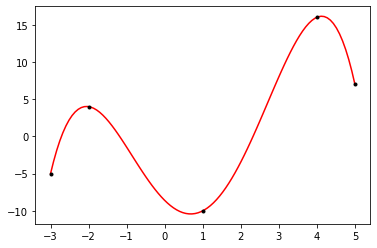

In [61]:
plt.plot(xg, yg, 'r')
plt.plot(xp, yp, 'k.')
plt.show()

---

## **2.1.5. Polinomios de Lagrange**

---

### **2.1.5.1. Deducción de la fórmula de Lagrange**

In [62]:
x = sp.symbols('x')

In [63]:
xp = [1, 2, 3, 4]
yp = [1, 3, 2, 4]

In [64]:
m = len(xp)

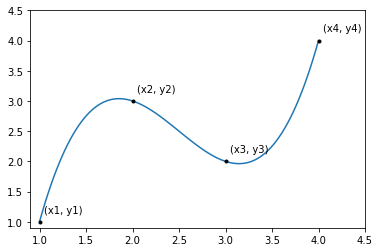

In [65]:
xe = np.linspace(1, 4, 100)
ye = 1.0*xe**3 - 7.5*xe**2 +17.5*xe - 10.0

fig = plt.figure()
plt.plot(xe, ye)
plt.plot(xp, yp, 'k.')

for i in range(m):
    plt.annotate(f'(x{i+1}, y{i+1})', (xp[i]+0.05, yp[i]+0.15))

plt.xlim(0.9, 4.5)
plt.ylim(0.9, 4.5)
plt.show()

Si tenemos 4 puntos ($x_p$, $y_p$):

- $p_1 = (x_1,y_1) = (1.0, 1.0)$
- $p_2 = (x_2,y_2) = (2.0, 3.0)$
- $p_3 = (x_3,y_3) = (3.0, 2.0)$
- $p_4 = (x_4,y_4) = (4.0, 4.0)$

$f(x) = L_1(x)f(x_1) + L_2(x)f(x_2) + L_3(x)f(x_3) + L_4(x)f(x_4)$ 

$f(x) = L_1(x)y_1 + L_2(x)y_2 + L_3(x)y_3 + L_4(x)y_4$  **Ec.(2)**

En donde $L_i(x)$ es una función que tiene sus ceros (raices) en todos los $x_p$, menos en el punto $x_i$. Adicionalemente, $L_i(x)$ cumple la condición de que $L_i(x_i)=1$. 

Garantización que la **Ec.(2)** al ser evaluada, por ejemplo, en $x_1$, se logre que $f(x)=y1$; ya que, $L_2(x)=L_3(x)=L_4(x)=0$ y $L_1(x)=1$.

$f(x_1) = (1)y_1 + (0)y_2 + (0)y_3 + (0)y_4=y_1$ 

De forma análoga para $y_2$, $y_3$ y $y_4$.

---

Para obtener una función $L_1(x)$, primero se crea un polinomio $P_1(x)$ que tenga sus ceros (raices) en los puntos $x_2$, $x_3$ y $x_4$:

$P_1(x)=(x-x_2)(x-x_3)(x-x_4)$

Es decir, 

$P_1(x)=(x-2)(x-3)(x-4)$

In [66]:
sp.expand((x-2)*(x-3)*(x-4))

x**3 - 9*x**2 + 26*x - 24

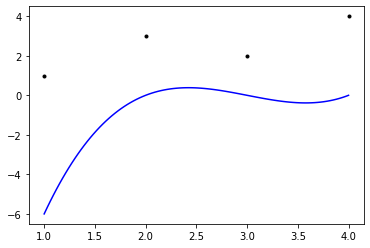

In [67]:
xe = np.linspace(1, 4, 100)
ye_1m = (xe-2)*(xe-3)*(xe-4)
plt.plot(xe, ye_1m, 'b')
plt.plot(xp, yp, 'k.')

Luego, el objetivo es llegar a $L_1(x)$ a partir  $P_1(x)$. Esto se logra dividiendo el polinomio entre la evaluación del polinomio en $x=x_1$, para así, garantizar que $L_1(x_1)=1$ y $L_1(x_2)=L_1(x_3)=L_1(x_4)=0$.

$L_1(x)=\displaystyle\frac{P_1(x)}{P_1(x_1)}$

In [68]:
x1 = 1
P1_1 = (x1-2)*(x1-3)*(x1-4)

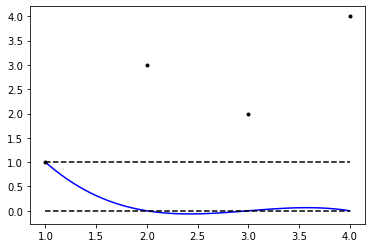

In [69]:
ye_1 = (xe-2)*(xe-3)*(xe-4)/P1_1
plt.plot(xe, ye_1, 'b')
plt.plot(xp, yp, 'k.')
plt.plot([1,4],[0,0],'--k')
plt.plot([1,4],[1,1],'--k')

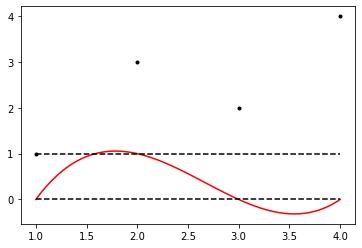

In [70]:
x2 = 2
P2_2 = (x2-1)*(x2-3)*(x2-4)
ye_2 = (xe-1)*(xe-3)*(xe-4)/P2_2

plt.plot(xe, ye_2, 'r')
plt.plot(xp, yp, 'k.')
plt.plot([1,4],[0,0],'--k')
plt.plot([1,4],[1,1],'--k')

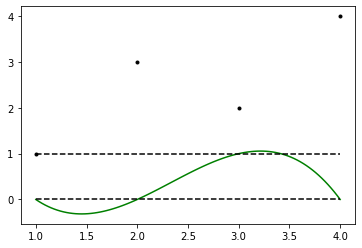

In [71]:
x3 = 3
P3_3 = (x3-1)*(x3-2)*(x3-4)
ye_3 = (xe-1)*(xe-2)*(xe-4)/P3_3

plt.plot(xe, ye_3, 'g')
plt.plot(xp, yp, 'k.')
plt.plot([1,4],[0,0],'--k')
plt.plot([1,4],[1,1],'--k')

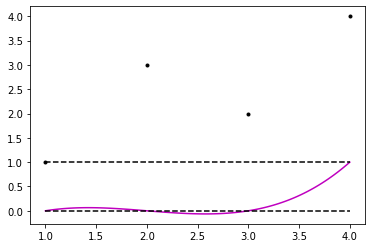

In [72]:
x4 = 4
P4_4 = (x4-1)*(x4-2)*(x4-3)

xe_4 = np.linspace(1, 4, 100)
ye_4 = (xe-1)*(xe-2)*(xe-3)/P4_4
plt.plot(xe_4, ye_4, 'm')
plt.plot(xp, yp, 'k.')
plt.plot([1,4],[0,0],'--k')
plt.plot([1,4],[1,1],'--k')

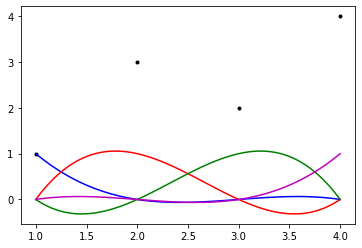

In [73]:
plt.plot(xp, yp, 'k.')
plt.plot(xe, ye_1, 'b')
plt.plot(xe, ye_2, 'r')
plt.plot(xe, ye_3, 'g')
plt.plot(xe, ye_4, 'm')

In [74]:
y1, y2, y3, y4 = 1, 3, 2, 4
poli = ye_1*y1 + ye_2*y2 + ye_3*y3 +ye_4*y4

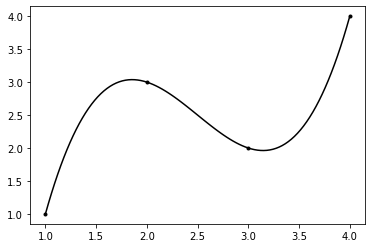

In [75]:
plt.plot(xp, yp, 'k.')
plt.plot(xe, poli, 'k')

In [76]:
ye_1m = (xe-2)*(xe-3)*(xe-4)
ye_2m = (xe-1)*(xe-3)*(xe-4)
ye_3m = (xe-1)*(xe-2)*(xe-4)
ye_4m = (xe-1)*(xe-2)*(xe-3)

In [77]:
def explicacion_pol_lagrange(paso):
    if paso==1:
        plt.plot(xp, yp, 'k.')
    elif paso==2:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1m, 'b--')
    elif paso==3:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1m, 'b--')           
        plt.plot(xe, ye_1, 'b')
    elif paso==4:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')
    elif paso==5:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')
        plt.plot(xe, ye_2m, 'r--')
    elif paso==6:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')
        plt.plot(xe, ye_2m, 'r--')        
        plt.plot(xe, ye_2, 'r')
    elif paso==7:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')   
        plt.plot(xe, ye_2, 'r')
    elif paso==8:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')   
        plt.plot(xe, ye_2, 'r')
        plt.plot(xe, ye_4m, 'g--')
    elif paso==9:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')   
        plt.plot(xe, ye_2, 'r')
        plt.plot(xe, ye_4m, 'g--')
        plt.plot(xe, ye_3, 'g')
    elif paso==10:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')   
        plt.plot(xe, ye_2, 'r')
        plt.plot(xe, ye_3, 'g')
    elif paso==11:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')   
        plt.plot(xe, ye_2, 'r')
        plt.plot(xe, ye_3, 'g')
        plt.plot(xe, ye_4m, 'm--')
    elif paso==12:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')   
        plt.plot(xe, ye_2, 'r')
        plt.plot(xe, ye_3, 'g')
        plt.plot(xe, ye_4m, 'm--')
        plt.plot(xe, ye_4, 'm')
    elif paso==13:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')   
        plt.plot(xe, ye_2, 'r')
        plt.plot(xe, ye_3, 'g')
        plt.plot(xe, ye_4, 'm')
    elif paso==14:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')   
        plt.plot(xe, ye_2, 'r')
        plt.plot(xe, ye_3, 'g')
        plt.plot(xe, ye_4, 'm')
        plt.plot([1,4],[0,0],'--k')
        plt.plot([1,4],[1,1],'--k')
    elif paso==15:
        plt.plot(xp, yp, 'k.')
        plt.plot(xe, ye_1, 'b')   
        plt.plot(xe, ye_2, 'r')
        plt.plot(xe, ye_3, 'g')
        plt.plot(xe, ye_4, 'm')
        plt.plot(xe, poli, 'k')


In [78]:
from ipywidgets import interact 
interact(explicacion_pol_lagrange, paso = (1, 15))
None

interactive(children=(IntSlider(value=8, description='paso', max=15, min=1), Output()), _dom_classes=('widget-…

---

### **2.1.5.2. Definición del método**

El **polinomio interpolador de Lagrange** se define como el polinomio de grado $n-1$ que pasa por los $n$ puntos $\{(x_i,y_i):i=1,2,...n\}$. Dicho polinomio se define como la combinación lineal:

$f_{n}(x)=\displaystyle\sum_{i=1}^{n}L_{i}(x)y_i$

donde $L_{i}(x)$ son las *bases polinómicas de Lagrange*:

$L_{i}(x)=\displaystyle\prod_{j=1, i\neq j}^{n}  \displaystyle\frac{x-x_j}{x_i-x_j}$
$=\displaystyle\frac{x-x_1}{x_i-x_1}...\displaystyle\frac{x-x_{i-1}}{x_i-x_{i-1}}\displaystyle\frac{x-x_{i+1}}{x_i-x_{i+1}}...\displaystyle\frac{x-x_{n}}{x_i-x_{n}}$

---

Observemos que el numerador de $L_i$ es un polinomio:

$P_{i}(x)=(x-x_1)...(x-x_{i-1})(x-x_{i+1})...(x-x_{n})$

que tiene la particularidad de que $P_{i}(x_j)=0$ si $i \neq j$.

El denominador de $L_i$ es en realidad $P_{i}(x_i)$, cumpliendo el objetivo de normalizar $P_{i}(x)$ respecto a $x_i$, es decir:

$L_{i}(x_j)=0$ para $i \neq j$

$L_{i}(x_j)=1$ para $i=j$

**Nota:** Por definición el *polinomio de Lagrange* debe ser una función, es decir, todos los $x_i$ deben ser diferentes. Si esto no se cumple, se presentan divisiones por cero.

---

### **2.1.5.3. Implementación en Python**

In [79]:
xp = [1.0, 2.0, 3.0, 4.0]
yp = [1.0, 3.0, 2.0, 4.0]

In [80]:
m = len(xp)  # Cantidad de puntos.

In [81]:
y = 0
for j in range(m):
    prod = 1
    for i in range(m):
        if i != j:
            prod = prod*(x-xp[i])/(xp[j]-xp[i])
    y += prod*yp[j]

In [82]:
sp.expand(y)  # Se mejora la representación del polinomio.

1.0*x**3 - 7.5*x**2 + 17.5*x - 10.0

---

Se crea una función con los resultados anteriores.

In [83]:
def polinomio_lagrange(xp, yp):
    
    m = len(xp)
    y = 0
    for j in range(m):
        prod = 1
        for i in range(m):
            if i != j:
                prod = prod*(x-xp[i])/(xp[j]-xp[i])
        y += prod*yp[j]

    y = sp.expand(y)
    f = sp.lambdify(x, y)
    
    return f, y

Ver: [19-interpolacion_pol_lagrange.py](https://github.com/jnramirezg/metodos_numericos_ingenieria_civil/blob/main/codigo/19-interpolacion_pol_lagrange.py)

In [84]:
f, y = polinomio_lagrange(xp, yp)

Polinomio interpolador:

In [85]:
y

1.0*x**3 - 7.5*x**2 + 17.5*x - 10.0

Evalución de la función en algunos puntos:

In [86]:
f(1)

1.0

In [87]:
f(4)

4.0

---

Ejemplo 2:

In [88]:
f, y = polinomio_lagrange([-2, 0, 2], [4, 0, 4])

In [89]:
y

x**2

In [90]:
f(2)

4

---

In [91]:
def graf_polinomio_lagrange(xp, yp):
    f, _ = polinomio_lagrange(xp, yp)  # Se extrae únicamente la función, no el polinomio.
    xeval = np.linspace(min(xp), max(xp), 100)
    yeval = f(xeval)
    
    plt.plot(xeval, yeval, 'b')
    plt.plot(xp, yp, 'k.')

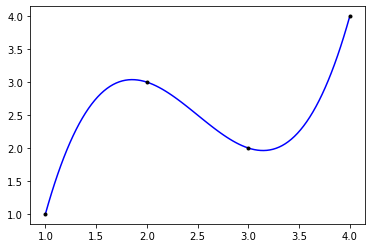

In [92]:
graf_polinomio_lagrange(xp, yp)

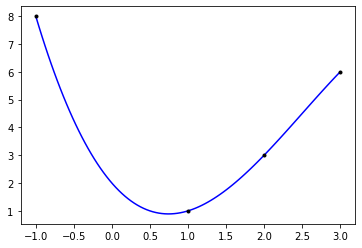

In [93]:
graf_polinomio_lagrange([1, 2, 3, -1], [1, 3, 6, 8])

---

### **2.1.5.4. Fenómeno de Runge**

Los polinomios de interpoladores de polinómicos vistos sufren del *fenómeno de Runge*, el cual se manifiesta con "oscilaciones salvajes" del polinomio interpolador. Este fenómeno ocurre cuando se usa interpolación polinómica con polimonios de alto grado utlizando puntos aproximadamente equidistanetes. Esto es muestra de que el uso de polinomios de alto grado no necesariamente mejora la precisión.

Se muestra a partir de la función:

$f(x)=\displaystyle\frac{1}{1+25x^2}$

en el intervalo -1 a 1.
    
    

Se crean 11 puntos entre -1 y 1 igualmente espaciados para crear a partir de ellos un polinomio interpolador y graficarlo:

In [94]:
x_p = np.linspace(-1, 1, 11)  # 11 puntos de evaluación entre -1 y 1.
y_p = 1/(1+25*x_p**2)

Se crea una evaluación detallada para comparar con el polinomio interpolador:

In [95]:
x_e = np.linspace(-1, 1, 100)  # 100 puntos de evluación entre -1 y 1.
y_e = 1/(1+25*x_e**2)

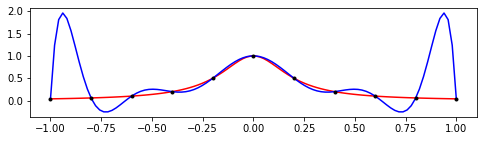

In [96]:
plt.figure(figsize=(8, 2))
# Gráfica "exacta" de la función.
plt.plot(x_e, y_e, 'r')
# Gráfica del polinomio interpolador a 11 puntos, es decir, grado 12.
graf_polinomio_lagrange(x_p, y_p)
plt.show()

---

## **2.1.6. Algunos comandos específicos**

**Matriz de Vandermonde**

Dados unos valores de x que, corresponden a ciertos puntos:

In [97]:
xp = [1, 2, 3, 5]

Su matriz de Vandermonde es:

In [98]:
np.vander(xp, increasing=True)

array([[  1,   1,   1,   1],
       [  1,   2,   4,   8],
       [  1,   3,   9,  27],
       [  1,   5,  25, 125]])

---

**Gráfica de interpolación polinómica**

Dado un conjunto de puntos:

In [99]:
xp = [1.0, 2.0, 3.0, 4.0]
yp = [1.0, 3.0, 2.0, 4.0]

Importando la función `interpolate.barycentric_interpolate` de `scipy` es posible obtener exactamente el mismo resultado que el de los polinomios interpoladores previamente vistos. Es decir, internamente hace lo mismo.

In [100]:
from scipy.interpolate import barycentric_interpolate

In [101]:
xg = np.linspace(min(xp), max(xp), 100)  # 100 puntos equidistantes entre mínimo y máximo de las x de los ptos.
yg = barycentric_interpolate(xp, yp, xg)

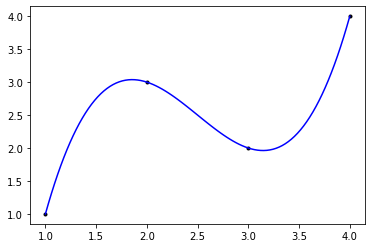

In [102]:
plt.plot(xp, yp, 'k.')
plt.plot(xg, yg, 'b')